In [132]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from scipy.stats import norm

In [133]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# normalize to [0,1]
X_train = X_train / 255
X_test = X_test / 255

In [134]:
train_split_int = []

for i in range(10):
    train_split_int.append(X_train[y_train == i])

In [135]:
# take avg of each digit
train_split_avg = [np.mean(train_split_int[i], axis=0) for i in range(10)]
train_split_sd = [np.std(train_split_int[i], axis=0) for i in range(10)]

In [136]:
train_split_avg[0].shape

(28, 28)

In [137]:
train_split_sd[0].shape

(28, 28)

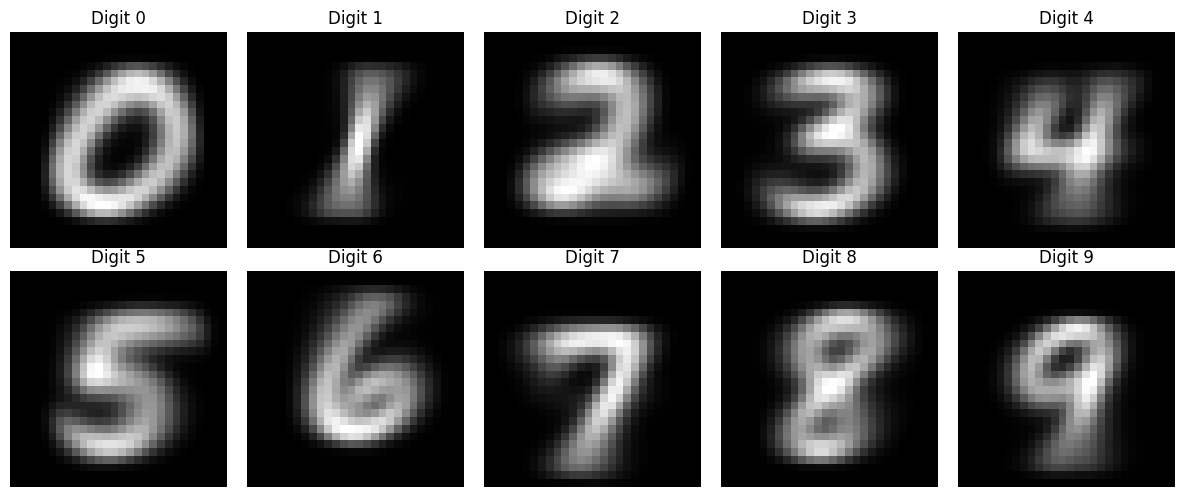

In [138]:
# show images of means of each digit's images
plt.figure(figsize=(12,5))

for i, img in enumerate(train_split_avg):
    plt.subplot(2, 5, i+1)
    plt.imshow(img, cmap='gray')
    plt.title(f"Digit {i}")
    plt.axis('off')

plt.tight_layout()
plt.show()

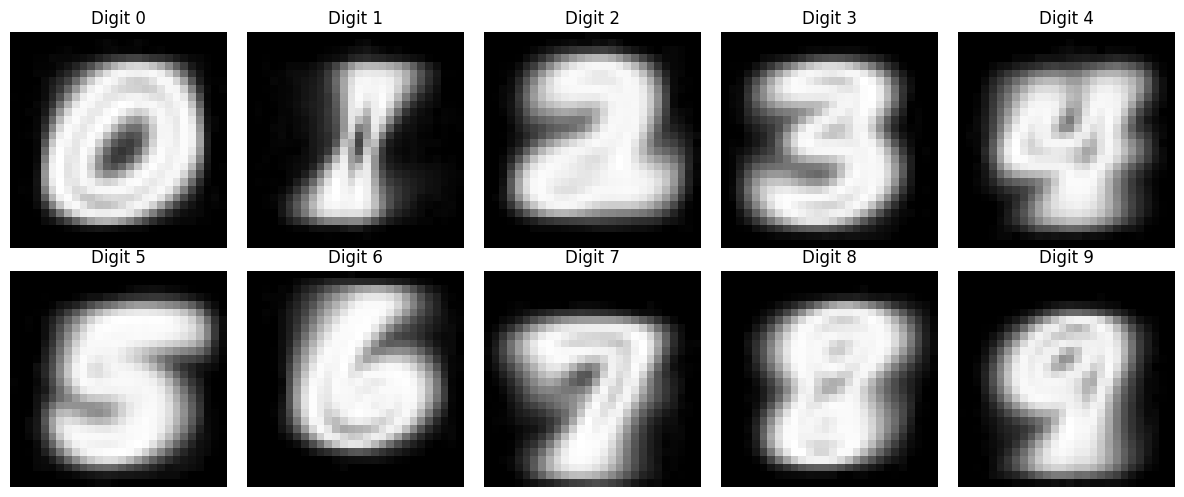

In [139]:
# show images of standard deviations of each digit's images
plt.figure(figsize=(12,5))

for i, img in enumerate(train_split_sd):
    plt.subplot(2, 5, i+1)
    plt.imshow(img, cmap='gray')
    plt.title(f"Digit {i}")
    plt.axis('off')

plt.tight_layout()
plt.show()

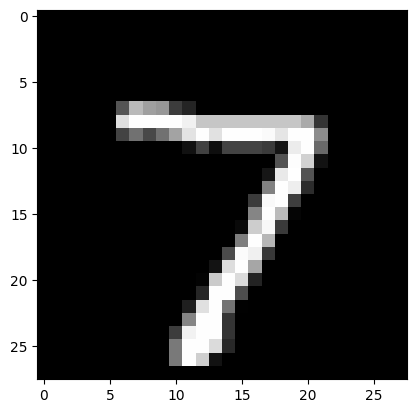

In [140]:
ex_img = X_test[0]
plt.imshow(ex_img, cmap='gray')

In [141]:
distances = np.abs(ex_img - train_split_avg)

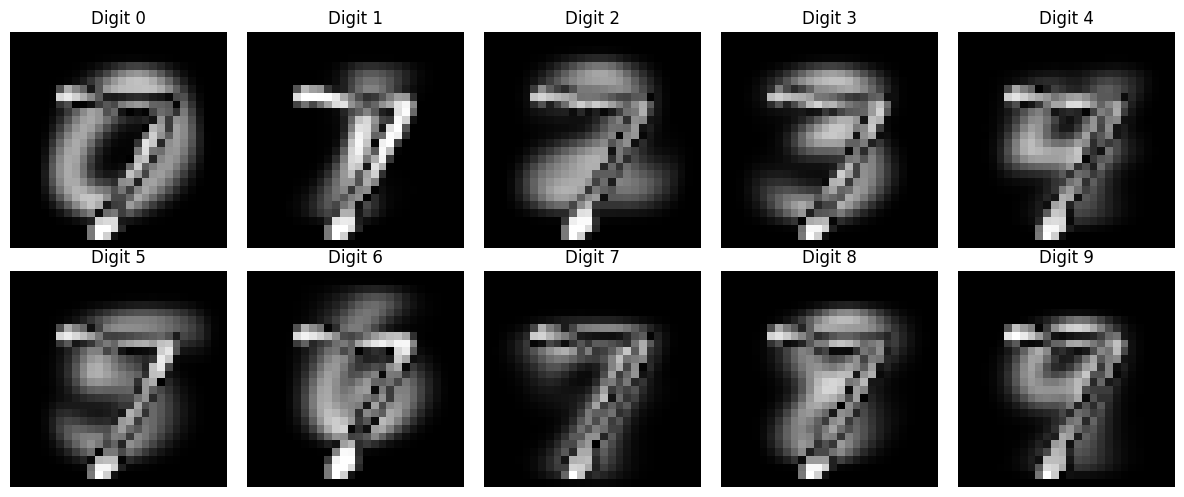

In [142]:
# show images of distances from example image to each digit mean
plt.figure(figsize=(12,5))

for i, img in enumerate(distances):
    plt.subplot(2, 5, i+1)
    plt.imshow(img, cmap='gray')
    plt.title(f"Digit {i}")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [176]:
# need to cap standard deviations to avoid division by zero
leniency = 0.01 # i think this counts as a hyperparameter

# leniency caps the zeros (because you cant have an std of 0
# higher leniency adds more noise to the model
# lower leniency should make the model more confident and lower noise

# basically how much the model penalizes "wrong" pixels compared to the avg

train_split_sd_cropped = [np.maximum(train_split_sd[i], leniency) for i in range(10)]

In [177]:
# gets the probability of this distance occurring given the distance of that digit (per pixel)
# norm_probs = norm.sf(ex_img, loc=train_split_avg, scale=train_split_sd_cropped) <--- this didnt work idk why (it should be better no? using normal distribution)
norm_probs = distances / train_split_sd_cropped + 10

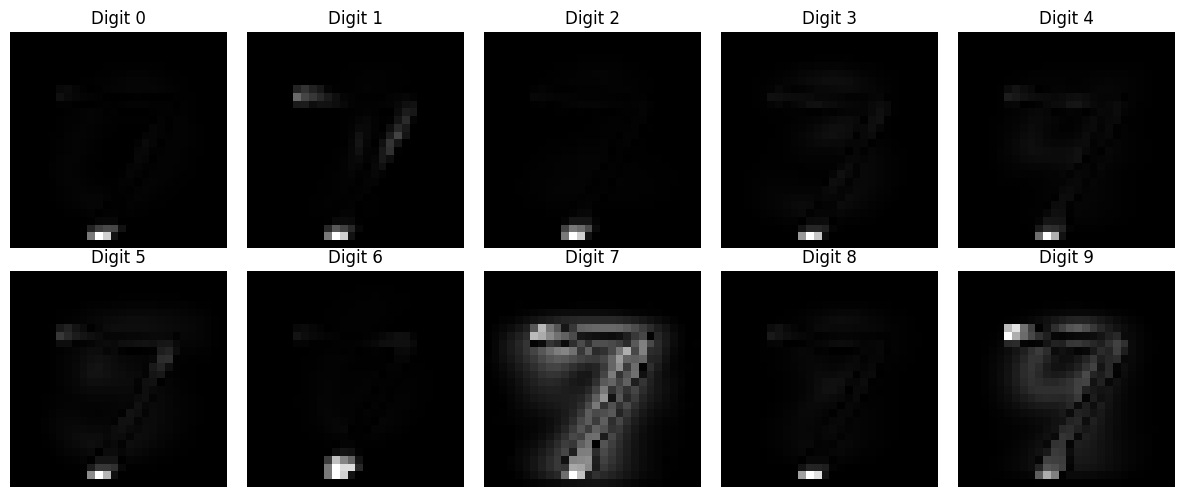

In [178]:
# show norm probs of distances from example image to each digit mean
plt.figure(figsize=(12,5))

for i, img in enumerate(norm_probs):
    plt.subplot(2, 5, i+1)
    plt.imshow(img, cmap='gray')
    plt.title(f"Digit {i}")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [179]:
avg_ex = np.average(norm_probs, axis=(1,2))
avg_ex

array([10.90174917, 11.28697775, 10.9393963 , 10.55813969, 10.49378007,
       10.49848721, 11.47186403, 10.26149409, 10.57487712, 10.36135154])

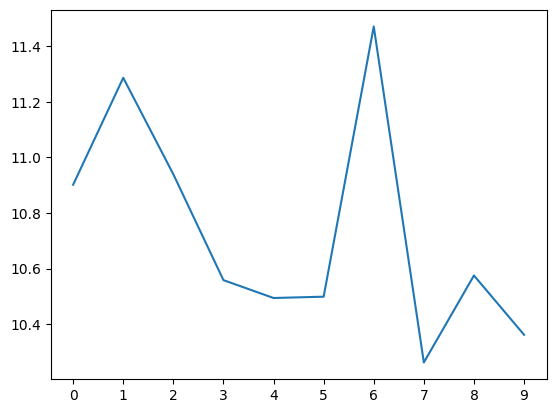

In [180]:
plt.plot(avg_ex)
plt.xticks(range(10))
plt.show()

In [224]:
leniency = 0.01

train_split_sd_cropped = [np.maximum(train_split_sd[i], leniency) for i in range(10)]

In [225]:
def classify(img):
    _norm_probs = np.abs(img - train_split_avg) / train_split_sd_cropped
    _avg = np.average(_norm_probs, axis=(1,2))
    # want lowest scaled distance
    return np.argmin(_avg)

In [226]:
def classify_squared(img):
    _norm_probs = (img - train_split_avg) ** 2 / train_split_sd_cropped
    _avg_ex = np.average(_norm_probs, axis=(1,2))
    # want lowest scaled distance
    return np.argmin(_avg_ex)

In [227]:
classify(ex_img)

np.int64(7)

In [228]:
y_pred = [classify(img) for img in X_test]
y_pred_squared = [classify_squared(img) for img in X_test]
len(y_pred)

10000

In [229]:
sum(np.array(y_pred) == y_test) / len(y_test)

np.float64(0.8437)

In [230]:
sum(np.array(y_pred_squared) == y_test) / len(y_test)

np.float64(0.8497)